<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2024-2025/Practiques/Pr5_Kolmogorov_Smirnov_(solucions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 5: Test de Kolmogorov-Smirnov** [Solucions]

# **Context**

Considera una mostra de 200 mesures, que segueix una distribució Alpha (valors a la caixa de codi). La distribució Alpha és una distribució $f(x,a)$, contínua en $x>0$ que depèn d'un paràmetre $a>0$. Consulta la documentació de la distribució a la documentació de Scipy: [+info](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alpha.html#scipy.stats.alpha)

Anem a utilitzar un mètode de Kolmogorov-Smirnov per calcular la $a_{òptima}$, la que millor s'ajusta a la distribució de probabilitat de la mostra.

En aquesta pràctica calcularem la $a_{òptima}$ utilitzant la funció cumulativa de la teva mostra i comparant-la amb diferents funcions cumulatives de test. Considerarem 1000 passos equidistants entre $a_{inf}$=4 i $a_{sup}$=6. En aquest cas, per a cada valor $x_i$ de la teva mostra, la funció cumulativa t'incrementa en un factor 1/200, i queda fixada, de manera similar al que vam veure a la pràctica anterior.

Per a cada punt de la teva mostra pots calcular la diferència de la funció cumulativa de la teva mostra amb el valor cumulatiu que obtens amb la funció de test en aquell mateix punt, aplicant un pes i fent una suma cumulativa de diferències o distàncies (al test de KS més comú s'empra el valor de desviació màxima). El que farem serà, per a cada punt d'avaluació, multiplicarem la distància pel valor de la pdf en aquell punt (perquè pesin més els valors més probables), i sumarem tots els valors absoluts de distàncies que evaluïs per a cada punt, així es promedien totes les diferències.

La funció de test que millor s'ajusta és aquella que està 'més' a prop de la teva funció cumulativa de mostra d'acord amb aquesta distància cumulativa ponderada, que anomenarem $d_{KS}$. Per a totes les teves variacions, el $a_{òptim}$ serà aquell que minimitza aquest valor de $d_{KS}$.

Per a un determinat $a_i$ el valor de $d_{KS_i}$ no és més que:

$$
d_{KS_i} = \sum_{n=1}^{200}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) | · PDF_{Alpha}(x_n,a_i) )
$$

Al test de KS més comú s'empra el valor de desviació màxima, que és:

$$
d_{max,i} = \max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) |)
$$

In [ ]:
m = [0.20519874,0.22837031,0.19126363,0.32276018,0.17537652,0.22414797,0.16295895,0.13710499,0.15611785,0.26053577,0.1617091,0.1693346
,0.1881494,0.25213246,0.19333813,0.1438632,0.21560716,0.14473274,0.1906784,0.19147847,0.17022168,0.20903645,0.19874541,0.2060689
,0.30452823,0.18536551,0.19175189,0.284228,0.18426284,0.23209381,0.15281151,0.17296157,0.16667163,0.16383119,0.167094,0.28496032
,0.23510851,0.22014383,0.20308247,0.16509226,0.24285629,0.18841502,0.17990038,0.20373326,0.23800791,0.21232215,0.29898765,0.19633689
,0.3751609,0.19515801,0.14313831,0.24077824,0.16880671,0.1946717,0.41240505,0.17077456,0.20313652,0.15593358,0.17656886,0.17380918
,0.23422621,0.17964926,0.20855601,0.22342886,0.18123829,0.22609662,0.18549983,0.21341533,0.20916246,0.18522614,0.2284777,0.27413668
,0.24158849,0.2469647,0.22429181,0.26965301,0.1990949,0.21651633,0.24276972,0.27107404,0.1875543,0.16890195,0.22064378,0.3502591
,0.22503167,0.22124863,0.20746592,0.18960446,0.14339987,0.25464606,0.21517341,0.23104685,0.24954671,0.27128461,0.19931616,0.23524964
,0.2227242,0.21385279,0.25727182,0.33831253,0.21971686,0.17946368,0.22753979,0.21289028,0.1868034,0.19064288,0.14742604,0.33425626
,0.1665892,0.17688704,0.18074927,0.20348305,0.15494665,0.16895975,0.29391039,0.17100367,0.16900192,0.16492088,0.22795783,0.37600683
,0.20477786,0.27684437,0.25441873,0.16328106,0.15424182,0.18806244,0.35963175,0.15418358,0.22299406,0.178216,0.14724334,0.20158341,
0.28862418,0.15376382,0.16107681,0.28901667,0.18834207,0.33845578,0.2536139,0.19784695,0.15547127,0.20980525,0.23772813,0.24065593,
0.18470287,0.16989653,0.20030683,0.43751089,0.18510672,0.18858219,0.23220894,0.15514005,0.18818845,0.18912303,0.24078569,0.26985248,
0.21521374,0.27216169,0.1991286,0.18860927,0.21064165,0.17151647,0.14001019,0.26920244,0.17876738,0.26339441,0.19730412,0.20846721,
0.30087128,0.1851004,0.26066636,0.17074887,0.20364119,0.18635092,0.18820526,0.20964836,0.16280991,0.18591968,0.25085569,0.24269228,
0.3106093,0.18180602,0.23893295,0.15998086,0.15270755,0.20414556,0.23980528,0.13257892,0.15652274,0.19351444,0.17642266,0.26750404,
0.21611941,0.17155038,0.19521034,0.23287878,0.23972591,0.54245327,0.21132737,0.19285463]

### <font color='orange'>**> Python #1**</font>

Segons la descripció del problema, sabem que el valor òptim de $a$ es troba entre 4 i 6.

Dibuixa la gràfica de la funció cumulativa de la mostra, i la funció cumulativa de la distribució Alpha per a tres valors de a: 4, 5, i 6.

A vista ja veiem que si $a=5$ tenim la situació que resembla millor les dades cumulatives... No és l'òptim, però s'assembla bastant!

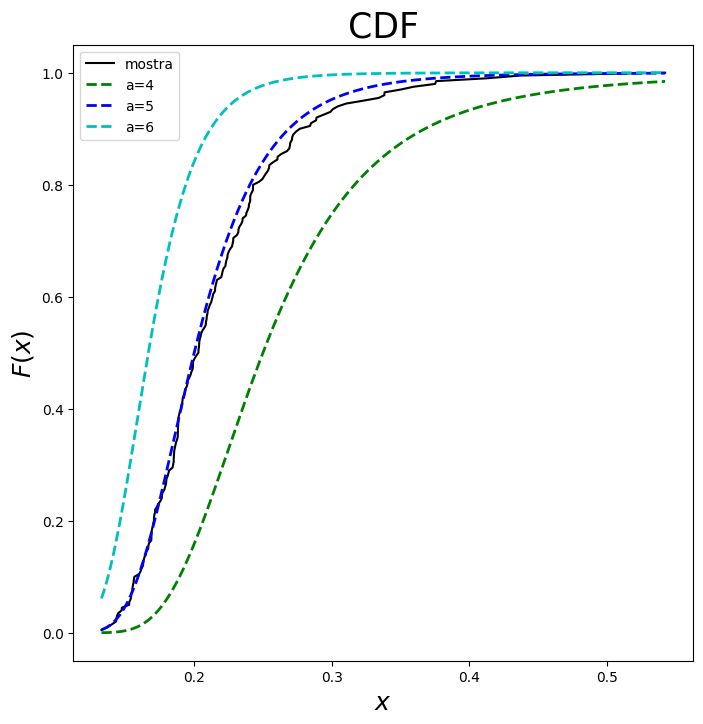

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

m = [0.20519874,0.22837031,0.19126363,0.32276018,0.17537652,0.22414797,0.16295895,0.13710499,0.15611785,0.26053577,0.1617091,0.1693346
,0.1881494,0.25213246,0.19333813,0.1438632,0.21560716,0.14473274,0.1906784,0.19147847,0.17022168,0.20903645,0.19874541,0.2060689
,0.30452823,0.18536551,0.19175189,0.284228,0.18426284,0.23209381,0.15281151,0.17296157,0.16667163,0.16383119,0.167094,0.28496032
,0.23510851,0.22014383,0.20308247,0.16509226,0.24285629,0.18841502,0.17990038,0.20373326,0.23800791,0.21232215,0.29898765,0.19633689
,0.3751609,0.19515801,0.14313831,0.24077824,0.16880671,0.1946717,0.41240505,0.17077456,0.20313652,0.15593358,0.17656886,0.17380918
,0.23422621,0.17964926,0.20855601,0.22342886,0.18123829,0.22609662,0.18549983,0.21341533,0.20916246,0.18522614,0.2284777,0.27413668
,0.24158849,0.2469647,0.22429181,0.26965301,0.1990949,0.21651633,0.24276972,0.27107404,0.1875543,0.16890195,0.22064378,0.3502591
,0.22503167,0.22124863,0.20746592,0.18960446,0.14339987,0.25464606,0.21517341,0.23104685,0.24954671,0.27128461,0.19931616,0.23524964
,0.2227242,0.21385279,0.25727182,0.33831253,0.21971686,0.17946368,0.22753979,0.21289028,0.1868034,0.19064288,0.14742604,0.33425626
,0.1665892,0.17688704,0.18074927,0.20348305,0.15494665,0.16895975,0.29391039,0.17100367,0.16900192,0.16492088,0.22795783,0.37600683
,0.20477786,0.27684437,0.25441873,0.16328106,0.15424182,0.18806244,0.35963175,0.15418358,0.22299406,0.178216,0.14724334,0.20158341,
0.28862418,0.15376382,0.16107681,0.28901667,0.18834207,0.33845578,0.2536139,0.19784695,0.15547127,0.20980525,0.23772813,0.24065593,
0.18470287,0.16989653,0.20030683,0.43751089,0.18510672,0.18858219,0.23220894,0.15514005,0.18818845,0.18912303,0.24078569,0.26985248,
0.21521374,0.27216169,0.1991286,0.18860927,0.21064165,0.17151647,0.14001019,0.26920244,0.17876738,0.26339441,0.19730412,0.20846721,
0.30087128,0.1851004,0.26066636,0.17074887,0.20364119,0.18635092,0.18820526,0.20964836,0.16280991,0.18591968,0.25085569,0.24269228,
0.3106093,0.18180602,0.23893295,0.15998086,0.15270755,0.20414556,0.23980528,0.13257892,0.15652274,0.19351444,0.17642266,0.26750404,
0.21611941,0.17155038,0.19521034,0.23287878,0.23972591,0.54245327,0.21132737,0.19285463]

b = np.sort(m)

x = np.linspace(np.min(b),np.max(b),1000)
n=np.linspace(1/len(b),1,len(b))

plt.figure(figsize=(8, 8))
plt.plot(b,n,'-',color='k', label='mostra')
plt.plot(x,ss.alpha.cdf(x,4),'g--', lw=2, label='a=4')
plt.plot(x,ss.alpha.cdf(x,5),'b--', lw=2, label='a=5')
plt.plot(x,ss.alpha.cdf(x,6),'c--', lw=2, label='a=6')
plt.legend()
plt.title('CDF', fontsize=25)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$F(x)$', fontsize=18)
plt.show()

### <font color='green'>**> Entrega #1**</font>

Implementa una funció que evalui el valor de $d_{KS_i}$ per a un determinat $a_i$, i evalua $d_{KS_i}$ per $a=4$, $a=5$, i $a=6$. A aquesta funció se li ha de passar els valors ordenats de $m$ i el valor de $a$ de test. Com veiem, el valor de $d_{KS}$ és el menor per $a=5$. **[2 punts]**

In [ ]:
def d_ks(b,a):
  return np.sum(np.abs(n-ss.alpha.cdf(b,a))*ss.alpha.pdf(b,a))

print("a=4 --> ", d_ks(b,4))
print("a=5 --> ", d_ks(b,5))
print("a=6 --> ", d_ks(b,6))

a=4 261.64476609245696
a=5 23.48232341627832
a=6 418.5780904885422


### <font color='green'>**> Entrega #2**</font>

Fes servir la funció que has creat i fes una gràfica dels valors $d_{KS}$ en el rang [$a_{inf}$,$a_{sup}$] i avalua quin és l’$a_{òptim}$ (el que minimitza la funció $d_{KS}$). **[4 punts]**

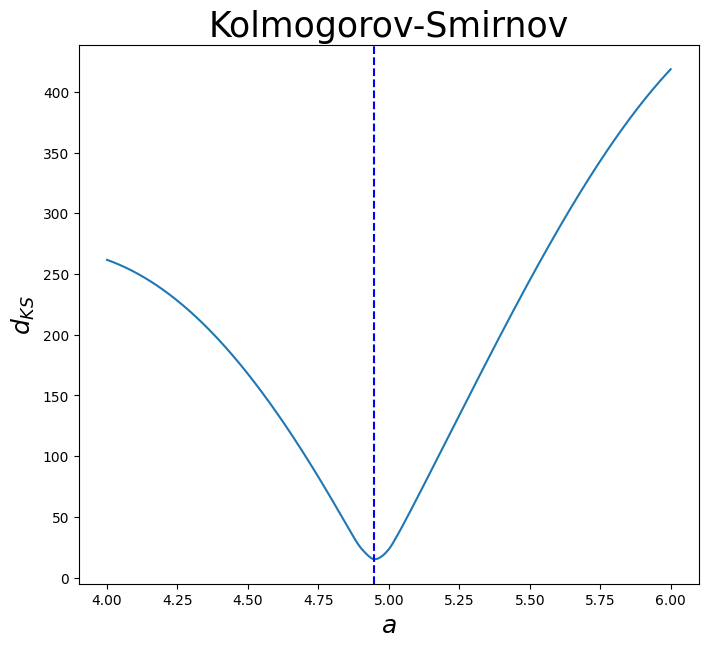


 a_óptimo KS = 4.95 



In [ ]:
mina = 4.
maxa = 6.

KS = []
b = np.sort(m)

astep = np.linspace(mina,maxa,1000)
n=np.linspace(1/len(b),1,len(b))

for i in range(len(astep)):
  KS.append(d_ks(b,astep[i]))

plt.figure(figsize=(8, 7))
plt.plot(astep,KS)
plt.title('Kolmogorov-Smirnov', fontsize=25)
plt.xlabel('$a$', fontsize=18)
plt.ylabel('$d_{KS}$', fontsize=18)
plt.axvline(astep[KS.index(np.min(KS))], linestyle='--', color='blue')
plt.show()

print("\n a_óptimo KS = {:3.2f} \n".format(astep[KS.index(np.min(KS))]))

### <font color='green'>**> Entrega #3**</font>

Quin sería $a_{òptim}$ si haguèssis fet servir el mètode estàndard de KS, és a dir el que evalua $d_{KS}$ com el màxim de la diferència entre la mostra i la CDF:

$$
d_{max,i} = \max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) |)
$$

Implementa una funció per a $d_{max,i}$ i procedeix com a l'apartat anterior, calcula $a_{òptim}$ amb aquest mètode.

**[2 punts]**

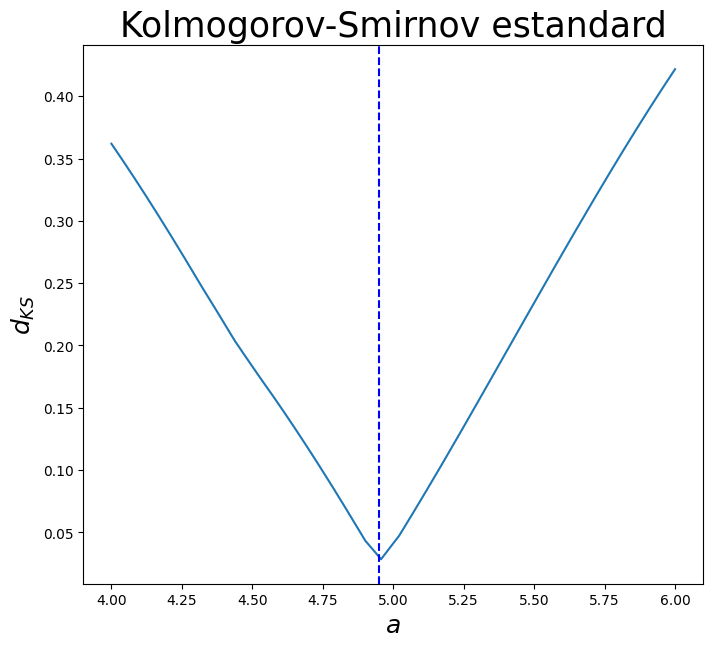


 a_óptimo KS = 4.96 



In [ ]:
mina = 4.
maxa = 6.

def dmax(b,a):
  return np.max(np.abs(n-ss.alpha.cdf(b,a)))

KSp = []
b = np.sort(m)

astep = np.linspace(mina,maxa,1000)
n=np.linspace(1/len(b),1,len(b))

for i in range(len(astep)):
  KSp.append(dmax(b,astep[i]))

plt.figure(figsize=(8, 7))

plt.plot(astep,KSp)
plt.title('Kolmogorov-Smirnov estandard', fontsize=25)
plt.xlabel('$a$', fontsize=18)
plt.ylabel('$d_{KS}$', fontsize=18)
plt.axvline(astep[KS.index(np.min(KS))], linestyle='--', color='blue')
plt.show()

print("\n a_óptimo KS = {:3.2f} \n".format(astep[KSp.index(np.min(KSp))]))

### <font color='green'>**> Entrega #4**</font>

Dibuixa un histograma normalitzat de la mostra, i la funció de distribució de probabilitat Alpha que millor s'ajusta, aquella amb $a_{òptim}$. Com que els dos mètodes donen valors similars, utilitza el $a_{òptim}$ que resulta de l'apartat 2. **[2 punts]**

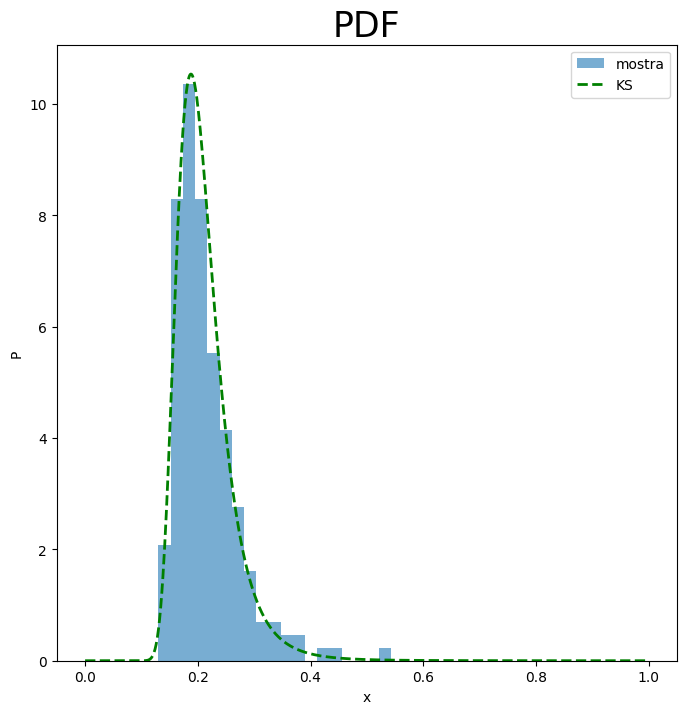

In [ ]:
x = np.linspace(0,1,1000)
y1 = ss.alpha.pdf(x,astep[KS.index(np.min(KS))])

plt.figure(figsize=(8, 8))
plt.hist(m, bins=25, range=[0,np.max(m)], density=True, alpha=0.6, label='mostra')
plt.plot(x,y1, 'g--', lw=2, label='KS')
plt.title('PDF', fontsize=25)
plt.xlabel("x")
plt.ylabel("P")
plt.legend()
plt.show()